<a href="https://colab.research.google.com/github/vaishak-krishnan/MNIST_Digit_Recognizer/blob/main/MNIST_Digit_Recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Description: This program use Convolutional Neural Networks(CNN)
#              classify handwritten digits as number 0-9

In [ ]:
#importing the libraries
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D
from keras.datasets import mnist
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Load the data and split it into train and test
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
#Get the image shape
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


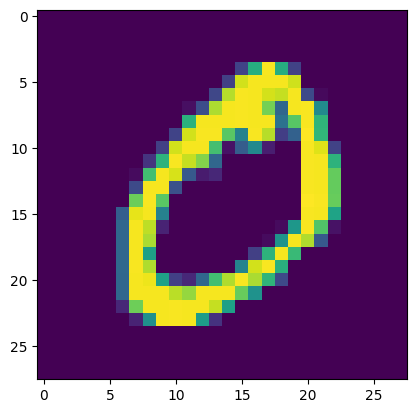

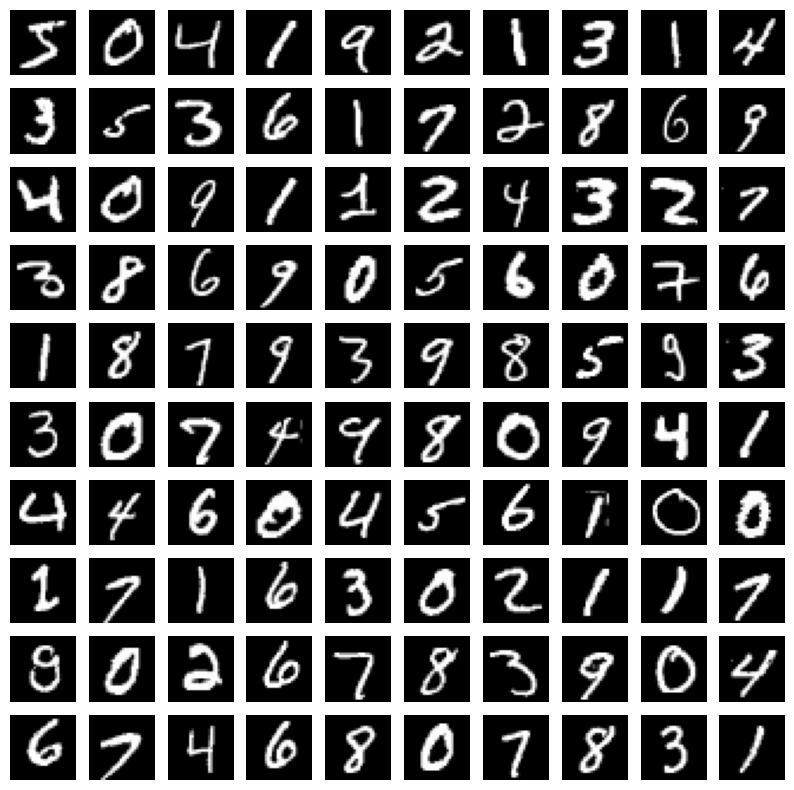

In [ ]:
plt.imshow(X_train[1])

# Display the first 100 images from the training dataset
plt.figure(figsize=(10, 10))
for i in range(100):
    plt.subplot(10, 10, i + 1)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()



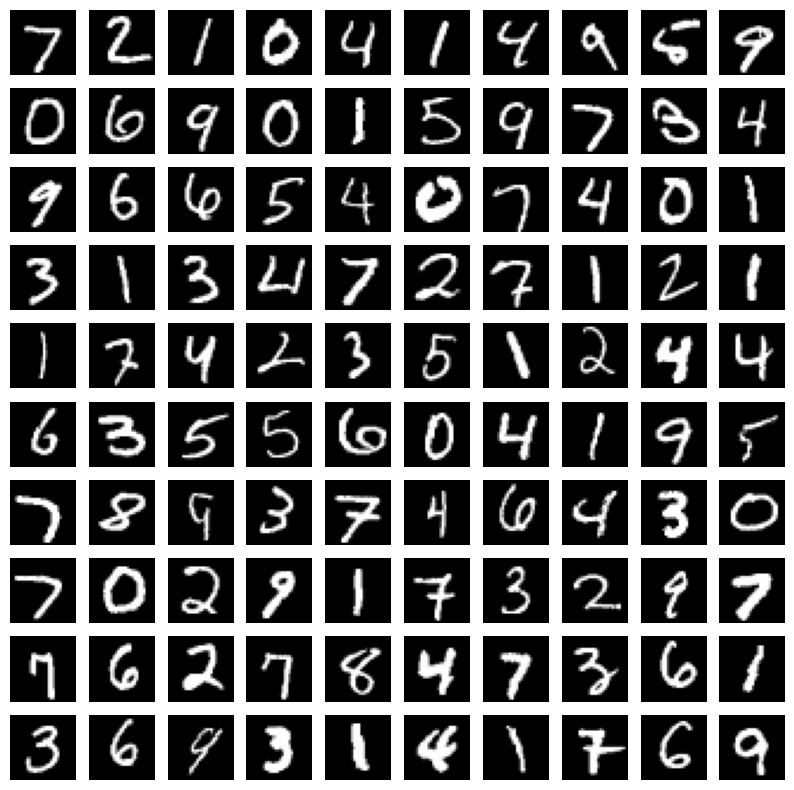

In [ ]:

plt.figure(figsize=(10, 10))
for i in range(100):
    plt.subplot(10, 10, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()

In [ ]:
# Reshaping the data to fit the model
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)


In [ ]:
# One-Hot Encoding:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

# Print the new label
# print(y_train_one_hot[0])
# print(y_train_one_hot[1])
# print(y_train_one_hot[2])
# print(y_train_one_hot[3])

for i in range(100):
    print(y_train_one_hot[i])


In [ ]:
# Build the CNN model
model = Sequential()
# Add model layers
model.add(Conv2D(64, kernel_size=3, activation = 'relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Train the model
hist = model.fit(X_train,y_train_one_hot, validation_data=(X_test,y_test_one_hot), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 25s 9ms/step - loss: 0.2230 - accuracy: 0.9517 - val_loss: 0.0877 - val_accuracy: 0.9727
Epoch 2/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0696 - accuracy: 0.9789 - val_loss: 0.0709 - val_accuracy: 0.9791
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0518 - accuracy: 0.9844 - val_loss: 0.0704 - val_accuracy: 0.9816
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0421 - accuracy: 0.9865 - val_loss: 0.0636 - val_accuracy: 0.9822
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0345 - accuracy: 0.9893 - val_loss: 0.0668 - val_accuracy: 0.9835
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0288 - accuracy: 0.9912 - val_loss: 0.0633 - val_accuracy: 0.9851
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0254 - accuracy: 0.9922 - val_loss: 0.0971 - val_accuracy

In [ ]:
# prompt: test model

loss, accuracy = model.evaluate(X_test, y_test_one_hot, verbose=False)
print("Loss:", loss)
print("Accuracy:", accuracy * 100, "%")


Loss: 0.10657308250665665
Accuracy: 98.28000068664551 %


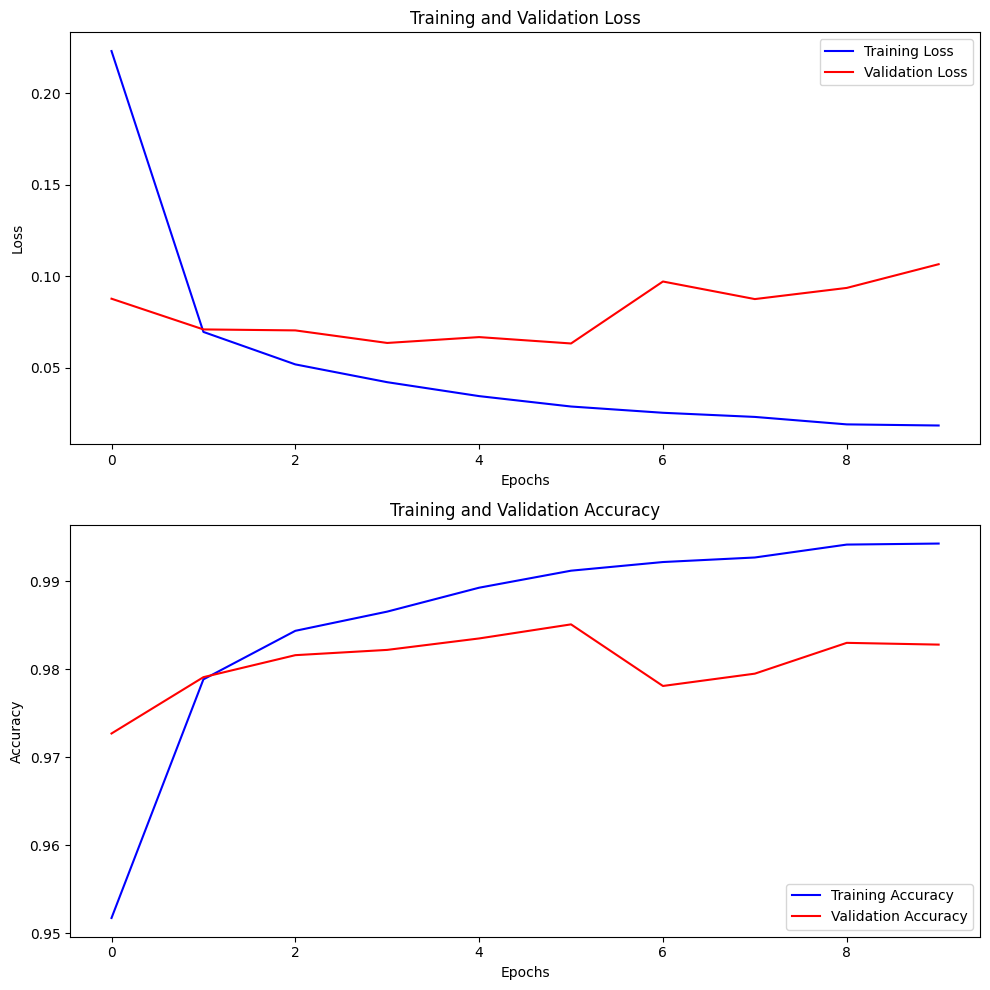

In [ ]:
# prompt: plot Loss and Accuracy

import matplotlib.pyplot as plt
# Plot the loss and accuracy of the model
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.plot(hist.history['loss'], color='b', label='Training Loss')
plt.plot(hist.history['val_loss'], color='r', label='Validation Loss')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')

plt.subplot(2, 1, 2)
plt.plot(hist.history['accuracy'], color='b', label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], color='r', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.tight_layout()
plt.show()


In [ ]:
print(y_train[0])


5


In [ ]:
from keras.preprocessing import image

# Function to preprocess the uploaded image
def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(28, 28), color_mode="grayscale")
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Normalize the pixel values
    img_array = img_array.reshape(1, 28, 28, 1)  # Reshape to match the model input shape
    return img_array

# Example usage:
uploaded_image_path = "/content/download (1).png"
preprocessed_image = preprocess_image(uploaded_image_path)

# Make predictions using the trained model
predictions = model.predict(preprocessed_image)

# Get the predicted digit
predicted_digit = np.argmax(predictions)

print("Predicted Digit:", predicted_digit)


1/1 [==============================] - 0s 17ms/step
Predicted Digit: 1
